# **Prediction using Unsupervised ML** <br>




# **Author: Faiq Jamal**


---


# **Task:**
# **Predict the optimum number of clusters in Iris Dataset and represent it visually.**

* Load the Iris dataset and import the required libraries.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [72]:
from google.colab import files
Iris= files.upload()

Saving Iris.csv to Iris.csv


In [73]:
Iris_data=pd.read_csv("Iris.csv", index_col= False)
Iris_data.set_index("Id", inplace= True)
Iris_data=Iris_data.iloc[:, [0, 1, 2, 3]]

* Analysing Dataset

In [74]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [75]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Scatterplot to visualise data based on sepals and petals width and length

Text(0, 0.5, 'Width')

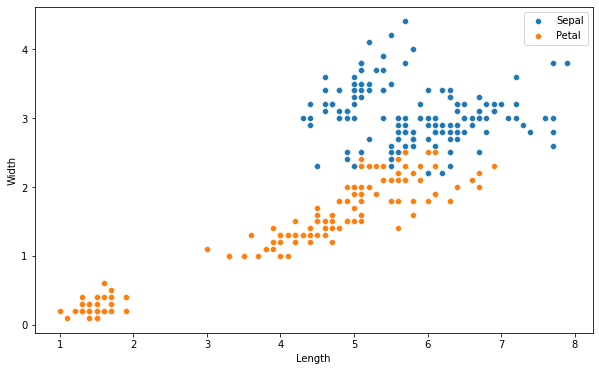

In [76]:
#scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm', y ='SepalWidthCm', data=Iris_data, label='Sepal')
sns.scatterplot(x='PetalLengthCm', y ='PetalWidthCm', data=Iris_data, label='Petal')
plt.xlabel('Length')
plt.ylabel('Width')

* Finding the correlation between individual features.

In [77]:
Iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


* Using heatmap, visualize the correlation between individual features.

<AxesSubplot:>

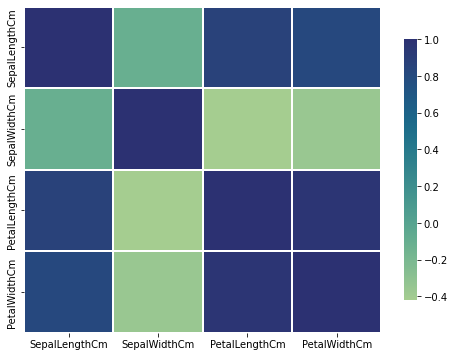

In [78]:
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(Iris_data.corr(),cmap="crest", linewidth=0.3, cbar_kws={"shrink": .8})

* Initialize the within-cluster sum of squares (WCSS) and create a loop to fit multiple K-Means models with different values of K and calculate the corresponding WCSS for each model.

In [84]:
x = Iris_data.values
wcss = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)



* Plot the WCSS values for different values of K to determine the elbow point.

Text(0, 0.5, 'Sum of Squared Error')

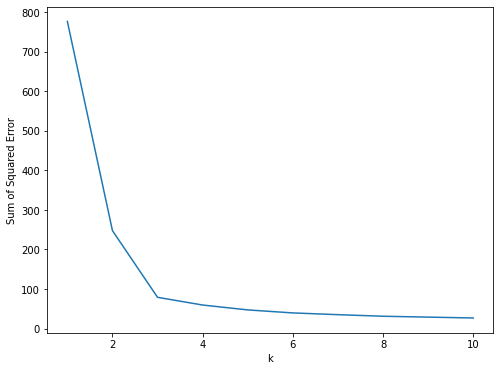

In [85]:
fig = plt.figure(1, figsize=(8, 6))
plt.plot(k_rng, wcss)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans_prediction = kmeans.fit_predict(x)
kmeans_prediction

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Plotting barplot to undertsand the quantity in individual clusters.

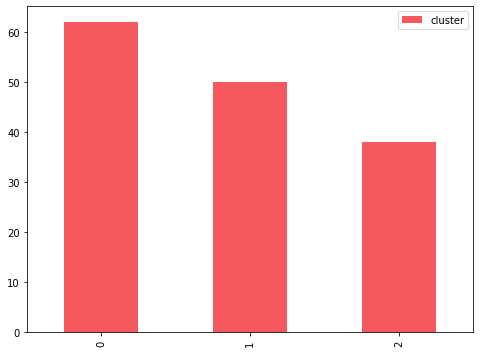

In [82]:
Iris_data['cluster'] = kmeans_prediction
fig = plt.figure(1, figsize=(8, 6))
Iris_data['cluster'].value_counts().plot(kind='bar', color="#f5585f")
plt.legend()

* Use the K-Means algorithm with the optimal value of K (3) and visualize the resulting clusters.

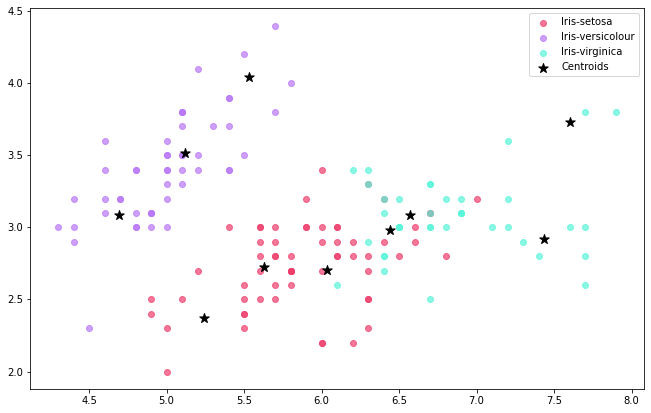

In [83]:
#2D visual of the final prediction
fig = plt.figure(1, figsize=(11, 7))
plt.scatter(x[kmeans_prediction == 0, 0], x[kmeans_prediction == 0, 1], alpha=0.7, label = 'Iris-setosa', color='#ee3e6c')
plt.scatter(x[kmeans_prediction== 1, 0], x[kmeans_prediction == 1, 1], alpha=0.7, label = 'Iris-versicolour', color='#b976f7')
plt.scatter(x[kmeans_prediction== 2, 0], x[kmeans_prediction == 2, 1], alpha=0.7, label = 'Iris-virginica', color='#58f5d9')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, marker='*', c='black', label = 'Centroids')

plt.legend()

The resulting visualization shows the three clusters with different colors representing each of the three iris species. The black stars represent the centroids of the clusters.

**Conclusion:**

Based on the elbow method, we can conclude that the optimum number of clusters for the 'Iris' dataset is 3, which is consistent with the actual number of species in the dataset.